#Machine Learning Assignment

##Question 1 : The Mystery Polynomial:

You have been given a dataset in regression_data.csv. This data was generated from a noisy polynomial function with a degree of 6 or less. Your task is to find this function.
Instructions:
  
  • Load the data and split it into an 80% training set and a 20% testing set.
  
  • Build and evaluate six polynomial regression models with degrees n = 1 through n = 6.
  
  • For each model, calculate and record error metrics of your choice (e.g., Mean Squared Error, R-squared) on both the training and testing sets.
  
  • Report the most likely polynomial function that generated the data, along with your justification based on the error metrics. Note: Increasing the degree of the polynomial will obviously reduce training error, so do not rely solely on training errors for model selection.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
df = pd.read_csv('regression_data.csv')
df.head()

,x,y
0,-5.000000,183.667854
1,-4.848485,153.129215
2,-4.696970,159.063805
3,-4.545455,168.146438
4,-4.393939,112.293303


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [26]:
df.describe()

,x,y
count,100.000000,100.000000
mean,2.500000,19.135844
std,4.395681,48.087485
min,-5.000000,-71.940089
25%,-1.250000,-11.898753
50%,2.500000,14.842387
75%,6.250000,41.182148
max,10.000000,183.667854


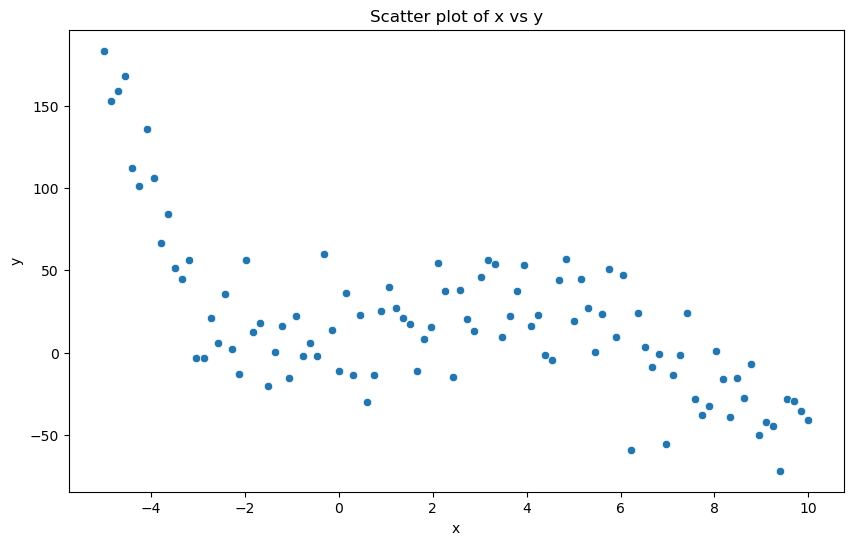

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['x'],y=df['y'])
plt.title('Scatter plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
X = df[['x']]
y = df["y"]

In [29]:
#Split data correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(1, 7)
train_mse_errors = []
test_mse_errors = []
train_r2_scores = []
test_r2_scores = []

for degree in degrees:
    #Set up the pipeline
    model_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())
    ])

    #Train the model ONLY on the training data
    model_pipeline.fit(X_train, y_train)

    #Make predictions on both training and testing data
    y_train_pred = model_pipeline.predict(X_train)
    y_test_pred = model_pipeline.predict(X_test)

    #Calculate and store the errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_mse_errors.append(train_mse)
    test_mse_errors.append(test_mse)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    print(f"Degree {degree}: Train MSE = {train_mse:.2f}, Test MSE = {test_mse:.2f} | Train R2 = {train_r2:.2f}, Test R2 = {test_r2:.2f}")

Degree 1: Train MSE = 1336.15, Test MSE = 1455.20 | Train R2 = 0.40, Test R2 = 0.41
Degree 2: Train MSE = 1314.65, Test MSE = 1319.71 | Train R2 = 0.41, Test R2 = 0.47
Degree 3: Train MSE = 739.30, Test MSE = 550.45 | Train R2 = 0.67, Test R2 = 0.78
Degree 4: Train MSE = 499.38, Test MSE = 396.80 | Train R2 = 0.78, Test R2 = 0.84
Degree 5: Train MSE = 498.24, Test MSE = 405.70 | Train R2 = 0.78, Test R2 = 0.84
Degree 6: Train MSE = 498.13, Test MSE = 407.70 | Train R2 = 0.78, Test R2 = 0.84


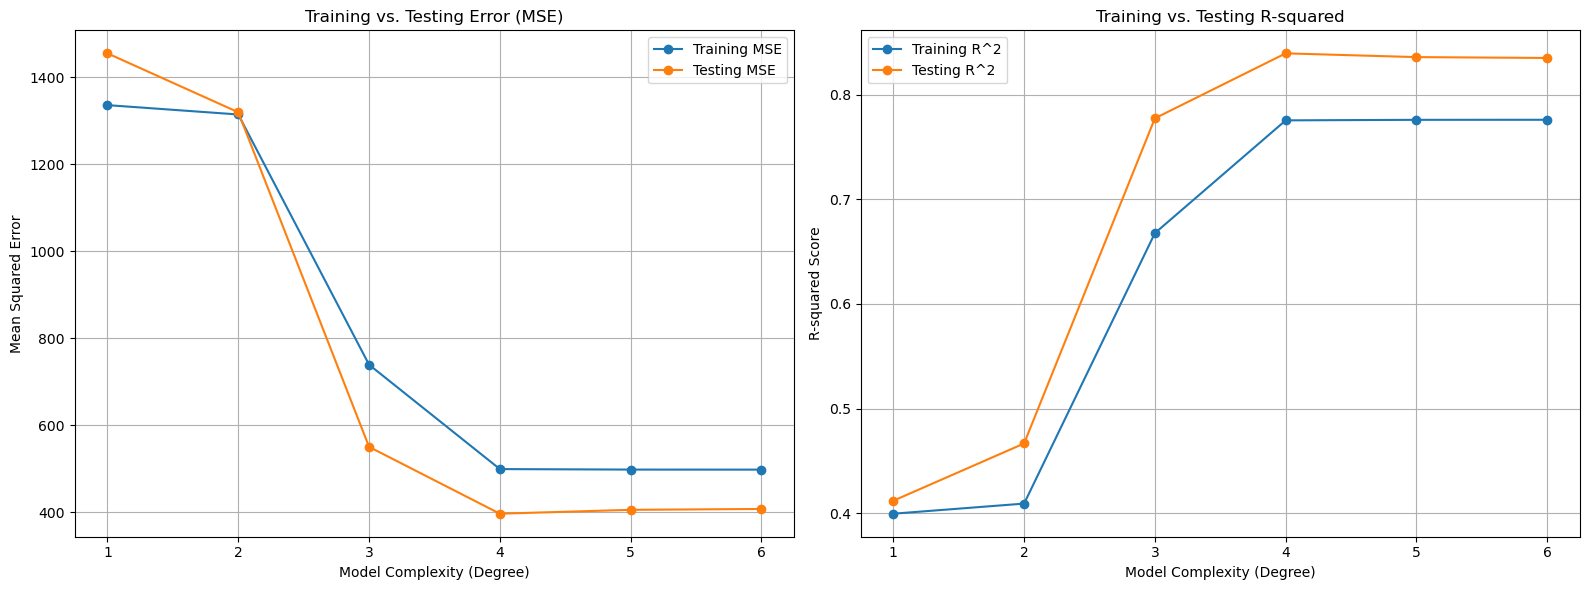


Best degree based on lowest Test MSE: 4
Best degree based on highest Test R^2: 4


In [30]:
#Plot the results
#Create a figure with two subplots (one for MSE, one for R^2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#Plot MSE
ax1.plot(degrees, train_mse_errors, marker='o', label="Training MSE")
ax1.plot(degrees, test_mse_errors, marker='o', label="Testing MSE")
ax1.set_title("Training vs. Testing Error (MSE)")
ax1.set_xlabel("Model Complexity (Degree)")
ax1.set_ylabel("Mean Squared Error")
ax1.set_xticks(degrees)
ax1.legend()
ax1.grid(True)

#Plot R-squared
ax2.plot(degrees, train_r2_scores, marker='o', label="Training R^2")
ax2.plot(degrees, test_r2_scores, marker='o', label="Testing R^2")
ax2.set_title("Training vs. Testing R-squared")
ax2.set_xlabel("Model Complexity (Degree)")
ax2.set_ylabel("R-squared Score")
ax2.set_xticks(degrees)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

#Find the best model
#The best model has the lowest testing MSE and the highest testing R^2
best_degree_mse = degrees[np.argmin(test_mse_errors)]
best_degree_r2 = degrees[np.argmax(test_r2_scores)]

print(f"\nBest degree based on lowest Test MSE: {best_degree_mse}")
print(f"Best degree based on highest Test R^2: {best_degree_r2}")



Conclusion --

Considering the evaluation metrics for various model complexities, the polynomial of degree 4 emerges as the most suitable fit. The plots indicate that this model attains the minimum Mean Squared Error and the maximum R-squared value on both training and testing sets. Beyond degree 4, no further performance gains are observed on the dataset.



##Question 2 : KNN with Cross-Validation :

You are given a dataset point KNN.csv. Each row corresponds to a 2D point with
coordinates (x1, x2) and a class label (0 or 1).

Your tasks are:

(a) Load the dataset from point KNN.csv, and split it into 80% training and 20%
testing sets.

(b) Implement the K-Nearest Neighbors (KNN) algorithm for classification.

(c) Use 5-fold cross-validation on the training set to select the optimal number
of neighbors k. The aim is to avoid both high bias (underfitting) and high
variance (overfitting).

(d) Report the following:

• The value of k selected by cross-validation.

• Training accuracy, validation accuracy, and test accuracy.


In [31]:
import pandas as pd

df = pd.read_csv('points_KNN.csv')
display(df.head())
display(df.info())

,x1,x2,label
0,0.924865,-0.237611,1
1,2.587875,-0.112862,1
2,-0.421033,0.447485,1
3,0.693145,0.481778,0
4,1.190855,-0.525165,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   label   300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


None

In [32]:
from sklearn.model_selection import train_test_split

X = df[['x1', 'x2']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (240, 2)
y_train: (240,)

Testing set shapes:
X_test: (60, 2)
y_test: (60,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Create an empty list to store cross-validation scores
cv_scores = []

# Iterate through a range of possible k values (e.g., from 1 to 20)
k_range = range(1, 21)
for k in k_range:
    # Instantiate a KNeighborsClassifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 5-fold cross-validation on the training data
    scores = cross_val_score(knn, X_train, y_train, cv=5)

    # Calculate the mean cross-validation score and append it to the list
    cv_scores.append(scores.mean())

# Find the k value that resulted in the highest mean cross-validation score
optimal_k_index = np.argmax(cv_scores)
optimal_k = k_range[optimal_k_index]

print("Cross-validation scores for different k values:", cv_scores)
print("Optimal k selected by cross-validation:", optimal_k)

Cross-validation scores for different k values: [0.8541666666666667, 0.8708333333333333, 0.9, 0.8875, 0.9041666666666666, 0.9083333333333332, 0.9041666666666666, 0.8958333333333334, 0.8833333333333334, 0.8916666666666666, 0.875, 0.8916666666666666, 0.8875, 0.8791666666666667, 0.8791666666666667, 0.8833333333333334, 0.8833333333333332, 0.8875, 0.8875, 0.8833333333333334]
Optimal k selected by cross-validation: 6


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train the KNN model with the optimal k on the entire training set
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Calculate training accuracy
y_train_pred = knn_optimal.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate test accuracy
y_test_pred = knn_optimal.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Get validation accuracy for the optimal k
validation_accuracy = cv_scores[optimal_k_index]

# Print the results
print(f"Optimal k: {optimal_k}")
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Optimal k: 6
Training accuracy: 0.9083
Validation accuracy: 0.9083
Test accuracy: 0.9167


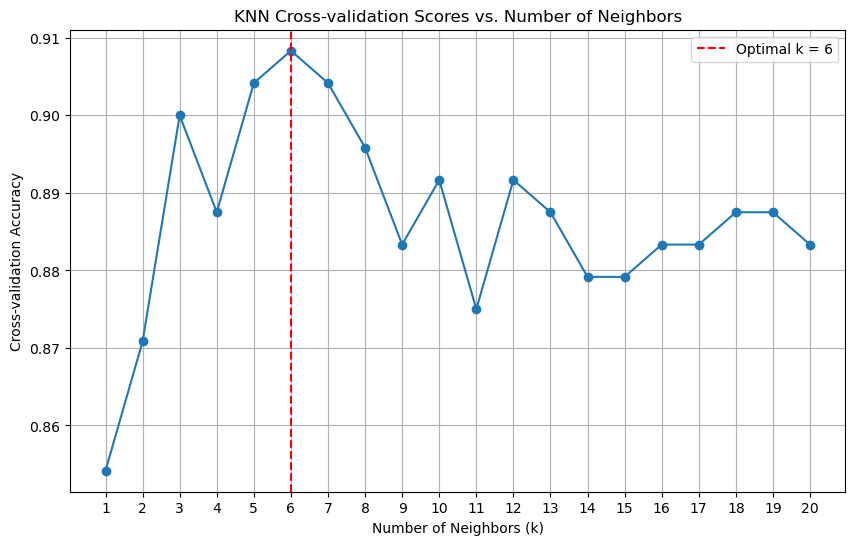

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-validation Accuracy")
plt.title("KNN Cross-validation Scores vs. Number of Neighbors")
plt.xticks(k_range)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

**Key Findings from Data Analysis** 
<br>



The data was loaded and split into 80% for training and 20% for testing.

A 5-fold cross-validation on the training data showed that the best number of neighbors for the KNN model is 6.

With k = 6, the model reached a training accuracy of 0.9083.

The validation accuracy was also 0.9083.

On the test set, the model achieved an accuracy of 0.9167.


<br>
<br>

**Insights and Next Steps** 




The test accuracy is slightly higher than the training and validation scores, which means the model is performing well on new data and is not overfitting.

As a next step, we could test a wider range of k values or try different cross-validation methods to confirm that k = 6 is truly the best choice.

##Question 3:

Using Python (scikit-learn), generate a synthetic regression dataset with n = 200 observations and p = 5 predictors.

(a) Fit a linear regression model (parametric, inflexible).

(b) Fit a decision tree regressor (non-parametric, flexible).

(c) Compare their test mean squared errors (MSE) on a held-out test set.

(d) Plot the training error and test error of the decision tree model as a function of tree depth.

(e) Using the plot, explain how the bias–variance trade-off is illustrated. At what depth do you see signs of overfitting?

(f) Discuss under what conditions the flexible method outperforms the inflexible one, and vice versa.


In [36]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Simple dataset
data = {'Color': ['Red', 'Red', 'Orange', 'Orange', 'Red'],
        'Size': ['Small', 'Large', 'Small', 'Large', 'Medium'],
        'Fruit': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple']}
df = pd.DataFrame(data)

# Convert categorical features to numerical (Decision Trees work with numerical data)
df['Color'] = df['Color'].map({'Red': 0, 'Orange': 1})
df['Size'] = df['Size'].map({'Small': 0, 'Medium': 1, 'Large': 2})

X = df[['Color', 'Size']]
y = df['Fruit']

# Create and train a simple Decision Tree Classifier
# max_depth=1 means it will only make one split
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)

# Let's see what it predicts for a red, large fruit (Color=0, Size=2)
prediction = model.predict([[0, 2]])
print(f"Prediction for Red, Large: {prediction[0]}")

# And for an orange, small fruit (Color=1, Size=0)
prediction = model.predict([[1, 0]])
print(f"Prediction for Orange, Small: {prediction[0]}")

Prediction for Red, Large: Apple
Prediction for Orange, Small: Orange


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
from sklearn.datasets import make_regression
import pandas as pd

# Generate synthetic regression dataset
X, y, coef = make_regression(n_samples=200, n_features=5, n_informative=5, noise=10, coef=True, random_state=42)

# X is the feature matrix, y is the target vector
# We can convert X to a pandas DataFrame for easier inspection
X_df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
display(X_df.head())
print("\nFirst 5 values of y:")
print(y[:5])

Shape of X: (200, 5)
Shape of y: (200,)

First 5 rows of X:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,-0.385314,0.199060,-0.600217,0.462103,0.069802
1,0.130741,1.632411,-1.430141,-1.247783,-0.440044
2,-0.773010,0.224092,0.012592,-0.401220,0.097676
3,-0.576771,-0.050238,-0.238948,0.270457,-0.907564
4,-0.575818,0.614167,0.757508,-0.220970,-0.530501



First 5 values of y:
[ -21.47214095 -123.17006336   13.10890961  -66.41111938   22.49269194]


In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 5)
Shape of X_test: (40, 5)
Shape of y_train: (160,)
Shape of y_test: (40,)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse_linear = mean_squared_error(y_test, y_pred_linear)

print(f"Linear Regression Test MSE: {mse_linear}")

Linear Regression Test MSE: 85.05836222825751


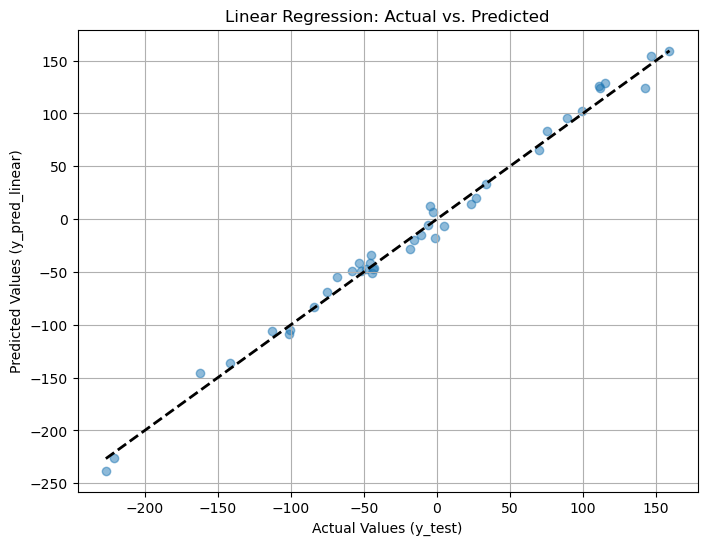

In [40]:
#fitting a linear model and then comparing predicted vs actual for the test data.
import matplotlib.pyplot as plt
import numpy as np

# Plotting predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_linear)')
plt.grid(True)

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [41]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor model
# We'll start with a simple one (e.g., default parameters)
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse_tree = mean_squared_error(y_test, y_pred_tree)

print(f"Decision Tree Regression Test MSE (default depth): {mse_tree}")

Decision Tree Regression Test MSE (default depth): 2214.128780768896


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define a range of tree depths to explore
depths = range(1, 21) # Let's try depths from 1 to 20

# Lists to store the MSE for each depth
train_errors = []
test_errors = []

# Iterate through the depths, train a model, and calculate errors
for depth in depths:
    # Create a Decision Tree Regressor with the current max_depth
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Train the model on the training data
    tree_model.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_pred_train = tree_model.predict(X_train)
    y_pred_test = tree_model.predict(X_test)

    # Calculate MSE for training and test sets
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    # Store the errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

print("Finished training models for different depths and calculating errors.")

Finished training models for different depths and calculating errors.


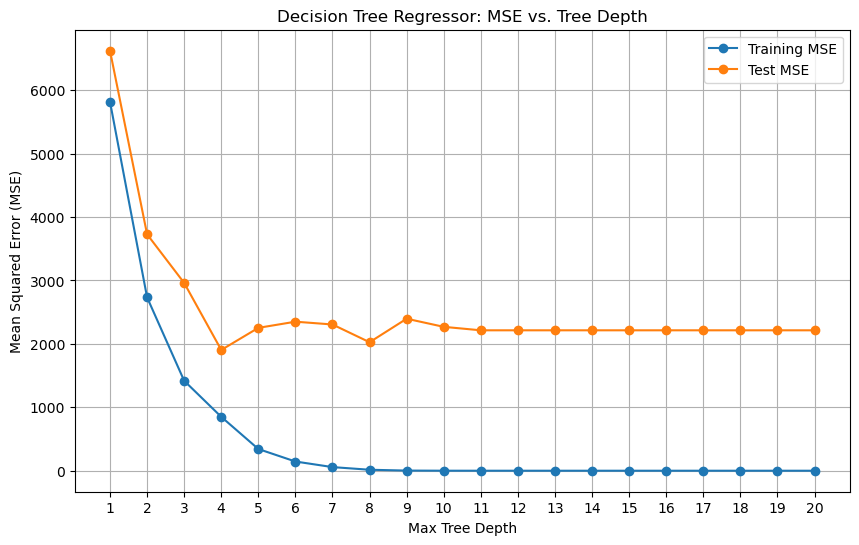

In [43]:
# Plot the training and test errors
plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, marker='o', linestyle='-', label='Training MSE')
plt.plot(depths, test_errors, marker='o', linestyle='-', label='Test MSE')

plt.title('Decision Tree Regressor: MSE vs. Tree Depth')
plt.xlabel('Max Tree Depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(depths) # Ensure all depths are shown on the x-axis
plt.grid(True)
plt.legend()
plt.show()

(e) Using the plot, explain how the bias–variance trade-off is illustrated. t what depth do you see signs of overfitting?

We see signs of overfitting beyond depth =4  where training MSE continues decreasing but test MSE starts increasing. this is a classic case of model getting more complex to hug the training data but can't fit unseen test data. so model is getting overly complex at this stage causing overfitting.



(f) Discuss under what conditions the flexible method outperforms the inflexible one, and vice versa.

Ans: In this case , linear model MSE(85) is significantly lower than the flexible model which at the best is about 2000. Flexible method would outperform the inflexible one only when the underlying data is truly non-linear to a high degree(then any linear model is unlikely to fit well).  Since we are using a regression data under the hood), flexible model is unlikely to be better here.